In [171]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [172]:
dataset = pd.read_csv("../../../assets/temp-prediction-dataset.csv")
dataset.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [173]:
dataset.shape

(348, 9)

* temp1 : 前天气温
* temp2 : 昨天气温
* average：往年平均
* actual：实际预测
* friend：朋友预测

In [174]:
# 时间数据处理
import datetime

years = dataset['year']
months = dataset['month']
days = dataset['day']

dates = [f"{year}-{month}-{day}" for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in dates]
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

In [175]:
# 礼拜数据处理，采用pandas内置的one-hot encode离散化
dataset = pd.get_dummies(dataset)
dataset.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


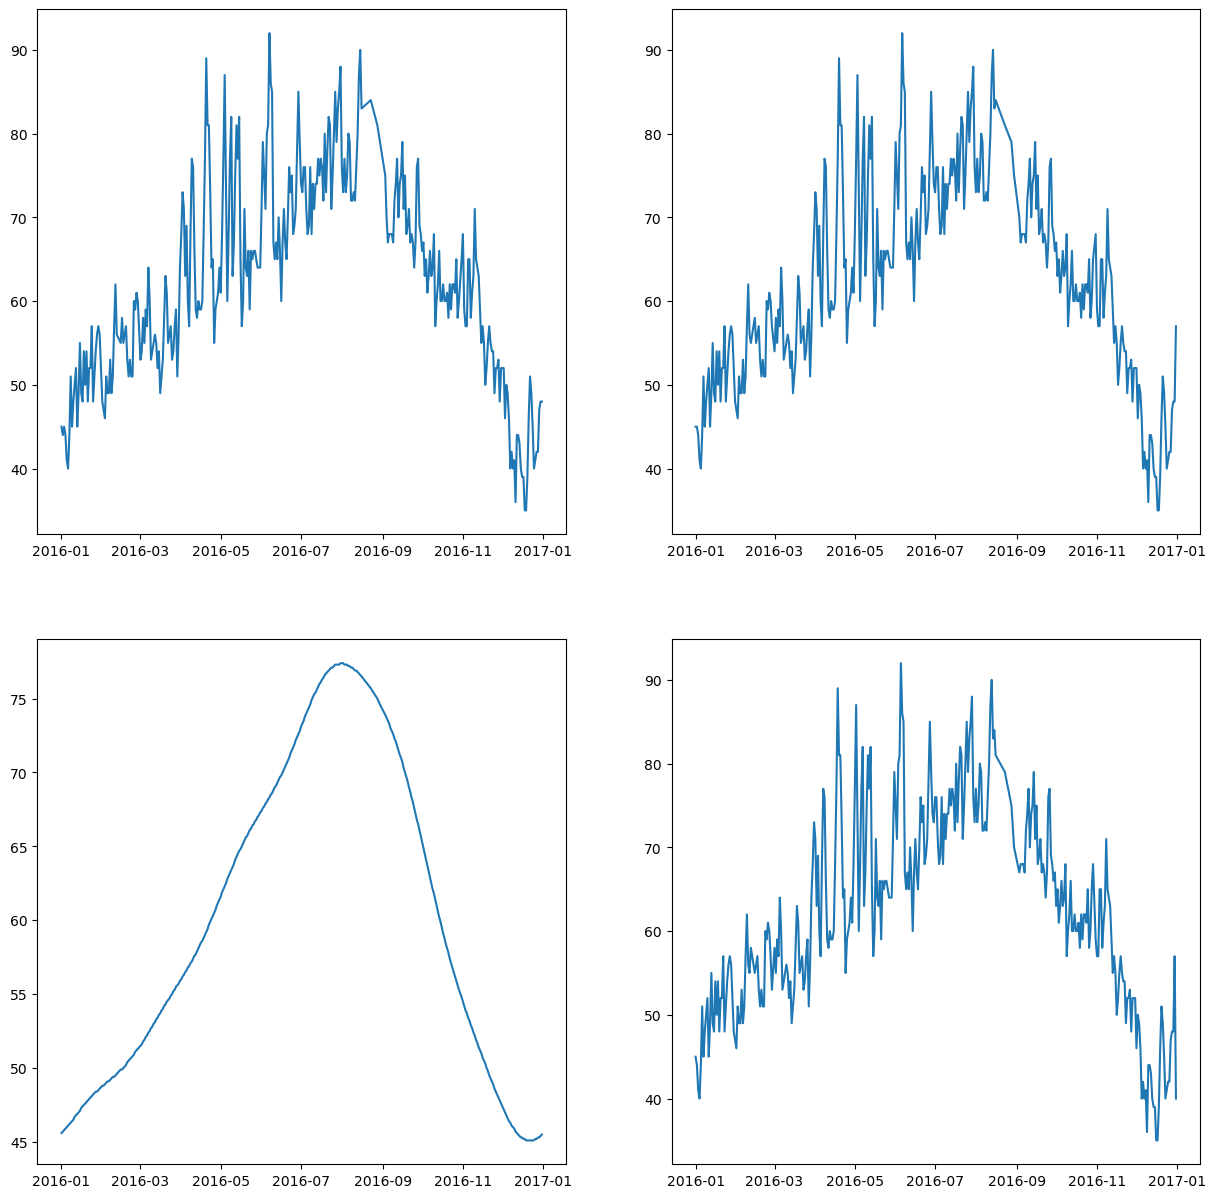

In [176]:
# 可视化
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

axs[0][0].plot(dates, dataset['temp_2'])
axs[0][1].plot(dates, dataset['temp_1'])
axs[1][0].plot(dates, dataset['average'])
axs[1][1].plot(dates, dataset['actual'])

plt.show()

In [177]:
# 提取features和labels，转换成numpy格式
labels = np.array(dataset['actual'])
features = np.array(dataset.drop('actual', axis=1))
labels.shape, features.shape

((348,), (348, 14))

In [178]:
# 预处理：数据标准化
from sklearn import preprocessing

std_features = preprocessing.StandardScaler().fit_transform(features)
std_features[:5]

array([[ 0.        , -1.5678393 , -1.65682171, -1.48452388, -1.49443549,
        -1.3470703 , -1.98891668,  2.44131112, -0.40482045, -0.40961596,
        -0.40482045, -0.40482045, -0.41913682, -0.40482045],
       [ 0.        , -1.5678393 , -1.54267126, -1.56929813, -1.49443549,
        -1.33755752,  0.06187741, -0.40961596, -0.40482045,  2.44131112,
        -0.40482045, -0.40482045, -0.41913682, -0.40482045],
       [ 0.        , -1.5678393 , -1.4285208 , -1.48452388, -1.57953835,
        -1.32804474, -0.25855917, -0.40961596, -0.40482045, -0.40961596,
         2.47023092, -0.40482045, -0.41913682, -0.40482045],
       [ 0.        , -1.5678393 , -1.31437034, -1.56929813, -1.83484692,
        -1.31853195, -0.45082111, -0.40961596,  2.47023092, -0.40961596,
        -0.40482045, -0.40482045, -0.41913682, -0.40482045],
       [ 0.        , -1.5678393 , -1.20021989, -1.8236209 , -1.91994977,
        -1.30901917, -1.2198689 , -0.40961596, -0.40482045, -0.40961596,
        -0.40482045, -0.40

In [179]:
# 构建网络
# 格式转换
# x = torch.tensor(std_features, dtype=float)
# y = torch.tensor(labels, dtype=float)
# # 构建神经网络
# weights = torch.randn((14, 128), dtype=float, requires_grad=True)
# biases = torch.randn(128, requires_grad=True, dtype=float)
# weights2 = torch.randn((128, 1), requires_grad=True, dtype=float)
# biases2 = torch.randn(1, requires_grad=True, dtype=float)
# # 参数
# learning_rate = 0.001
# epochs = 100000
# losses = []
# # cuda
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# weights = weights.to(device)
# weights2 = weights2.to(device)
# biases = biases.to(device)
# biases2 = biases2.to(device)
# x = x.to(device)
# y = y.to(device)
# weights

In [180]:
# # 训练
# for epoch in range(epochs):
#     hidden = x @ weights + biases
#     hidden = torch.relu(hidden)
#     predictions = hidden @ weights2 + biases2
#     loss = torch.mean((predictions - y) ** 2)
#     losses.append(loss.data.numpy())
#
#     if epoch % 100 == 0:
#         print(f"{epoch}/{epochs}, loss={loss}")
#
#     # 反向传播
#     loss.backward()
#
#     # 更新参数
#     # tensor .data 返回和 x 的相同数据 tensor,而且这个新的tensor和原来的tensor是共用数据的，一者改变，另一者也会跟着改变，而且新分离得到的tensor的require s_grad = False
#     weights.data.add_(-learning_rate * weights.grad.data)
#     weights2.data.add_(-learning_rate * weights2.grad.data)
#     biases.data.add_(-learning_rate * biases.grad.data)
#     biases2.data.add_(-learning_rate * biases2.grad.data)
#
#     # 清空grad
#     weights.grad.data.zero_()
#     weights2.grad.data.zero_()
#     biases.grad.data.zero_()
#     biases2.grad.data.zero_()

In [238]:
# param
input_size = std_features.shape[1]
hidden_size = 128
output_size = 1
batch_size = 12
epochs = 2000
learning_rate=0.001
# data
x = torch.tensor(std_features, dtype=torch.float)
y = torch.tensor(labels, dtype=torch.float)
# model
tempPredictionModel = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size)
)
cost = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(tempPredictionModel.parameters(), lr=learning_rate)
tempPredictionModel

Sequential(
  (0): Linear(in_features=14, out_features=128, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=128, out_features=1, bias=True)
)

In [239]:
#cuda
device="cuda:0" if torch.cuda.is_available() else "cpu"
x=x.to(device)
y=y.to(device)
tempPredictionModel=tempPredictionModel.to(device)

In [240]:
# train
for epoch in range(epochs):
    batch_loss = []
    for start in range(0, len(std_features), batch_size):
        # 抽取batch数据
        end = start + batch_size if (start + batch_size) < len(std_features) else len(std_features)
        xx = torch.tensor(std_features[start:end], dtype=torch.float, requires_grad=True)
        yy = torch.tensor(labels[start:end], dtype=torch.float, requires_grad=True)

        prediction = tempPredictionModel(xx)  # 前向传播
        prediction.squeeze_(-1)
        loss = cost(prediction, yy)  # 计算代价函数
        optimizer.zero_grad()  # 梯度清零
        loss.backward(retain_graph=True) # 反向传播
        optimizer.step() # 更新

        batch_loss.append(loss.data.numpy())

    if epoch % 100 ==0:
        print(f"{epoch}/{epochs}, loss={np.mean(batch_loss)}")

0/2000, loss=3902.006103515625
100/2000, loss=22.194124221801758
200/2000, loss=20.066930770874023
300/2000, loss=19.142248153686523
400/2000, loss=18.297887802124023
500/2000, loss=17.437135696411133
600/2000, loss=16.511268615722656
700/2000, loss=15.559236526489258
800/2000, loss=14.617310523986816
900/2000, loss=13.678629875183105
1000/2000, loss=12.72139835357666
1100/2000, loss=11.696154594421387
1200/2000, loss=10.591320037841797
1300/2000, loss=9.430139541625977
1400/2000, loss=8.23862075805664
1500/2000, loss=7.119459629058838
1600/2000, loss=6.106094837188721
1700/2000, loss=5.19700813293457
1800/2000, loss=4.387331485748291
1900/2000, loss=3.6692991256713867


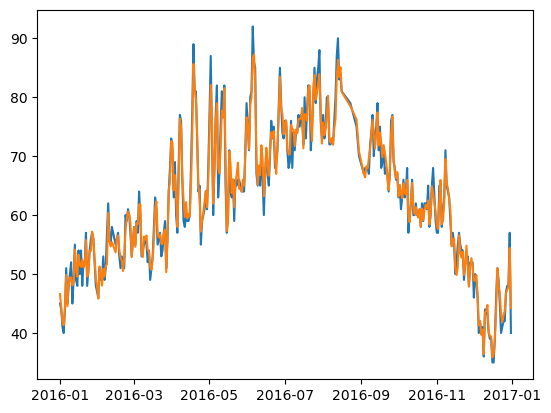

In [241]:
# eval
prediction=tempPredictionModel(x)
plt.plot(dates,dataset['actual'])
plt.plot(dates,prediction.data.numpy())